# Importing necessary libraries

In [5]:
# Importing Libraries
import pandas as pd #Data handling
import numpy as np #working with arrays 
import matplotlib.pyplot as plt
import seaborn as sb #data visualisation
import matplotlib.pyplot as plt

#Data preprocessing, model development and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
import sys; 
print(sys.version)

import sklearn
print(sklearn.__version__)

3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
1.5.1


# Loading data 

Use a few methods like head, info, and describe to understand it. 

In [49]:
df = pd.read_csv("data/winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [50]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [52]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Transposes the results 

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [54]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [55]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

# Data Pre-Processing

I see few of the columns have null except for type, free sulfur dioxide,
total sulfur dioxide, alcohol, quality. Imputing the missing values with mean.

In [56]:
for cols in df.columns:
    if df[cols].isnull().sum():
        df[cols] = df[cols].fillna(df[cols].mean())



In [57]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Encoding categorical column using lable encoding. Label encoding is suitable for categorical features with only two distinct categories. 

In [58]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Size' column
df['type'] = label_encoder.fit_transform(df['type'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


# Exploratory Data Analysis (EDA)

Distribution using a histogram showed me that the data was linear and continious

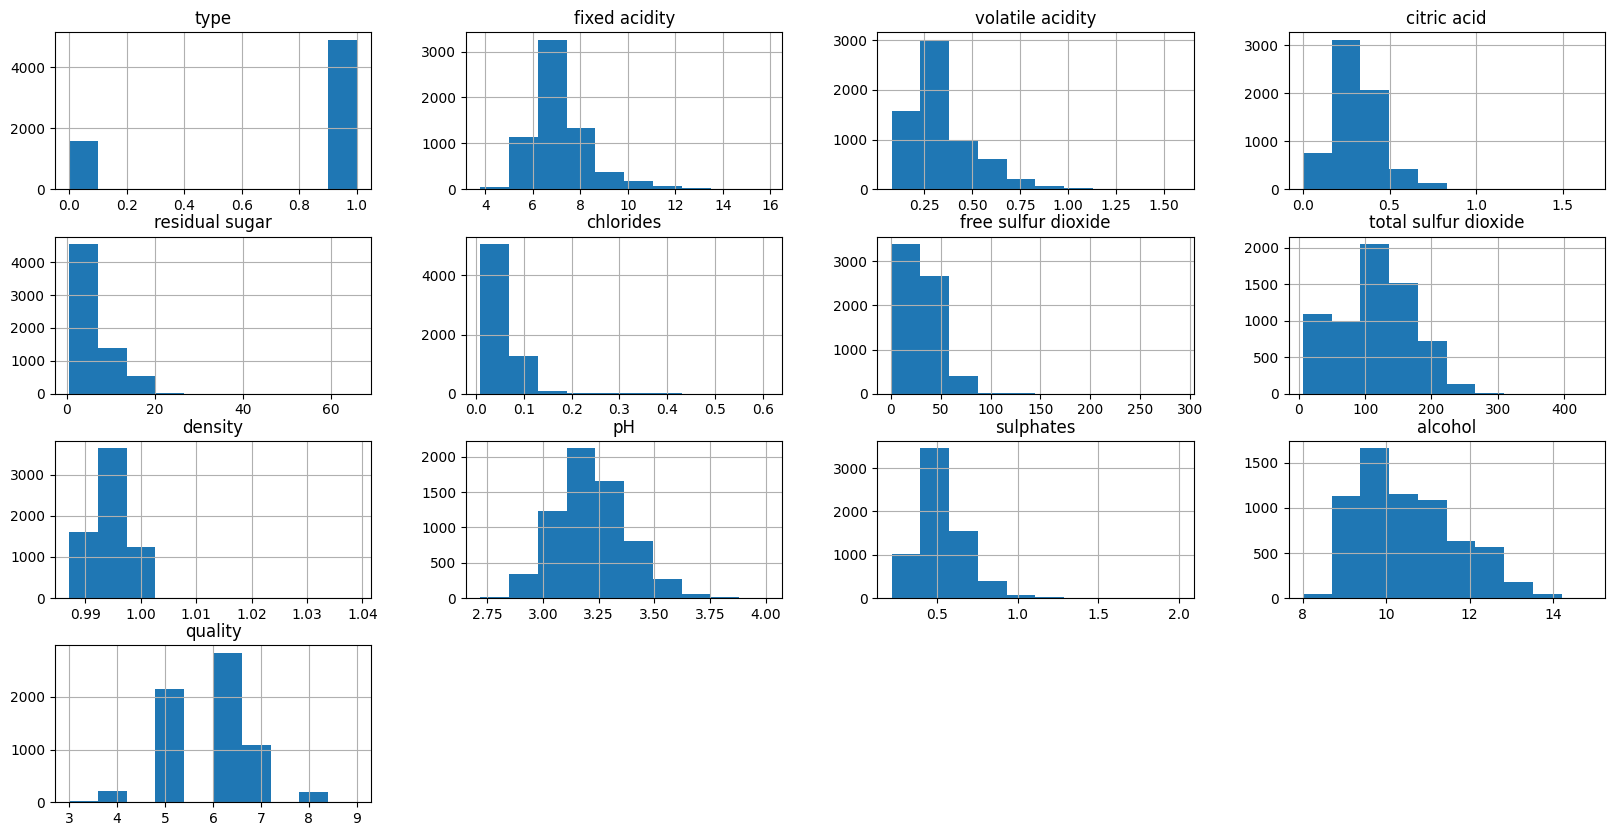

In [60]:
df.hist(figsize=(20,10))
plt.show()


Plot a count plot to identify the quantity

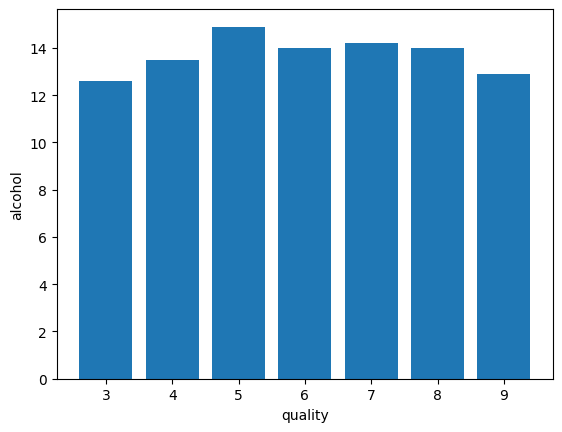

In [61]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

Correlation of the data will give us even more detail, before that some object

<Axes: >

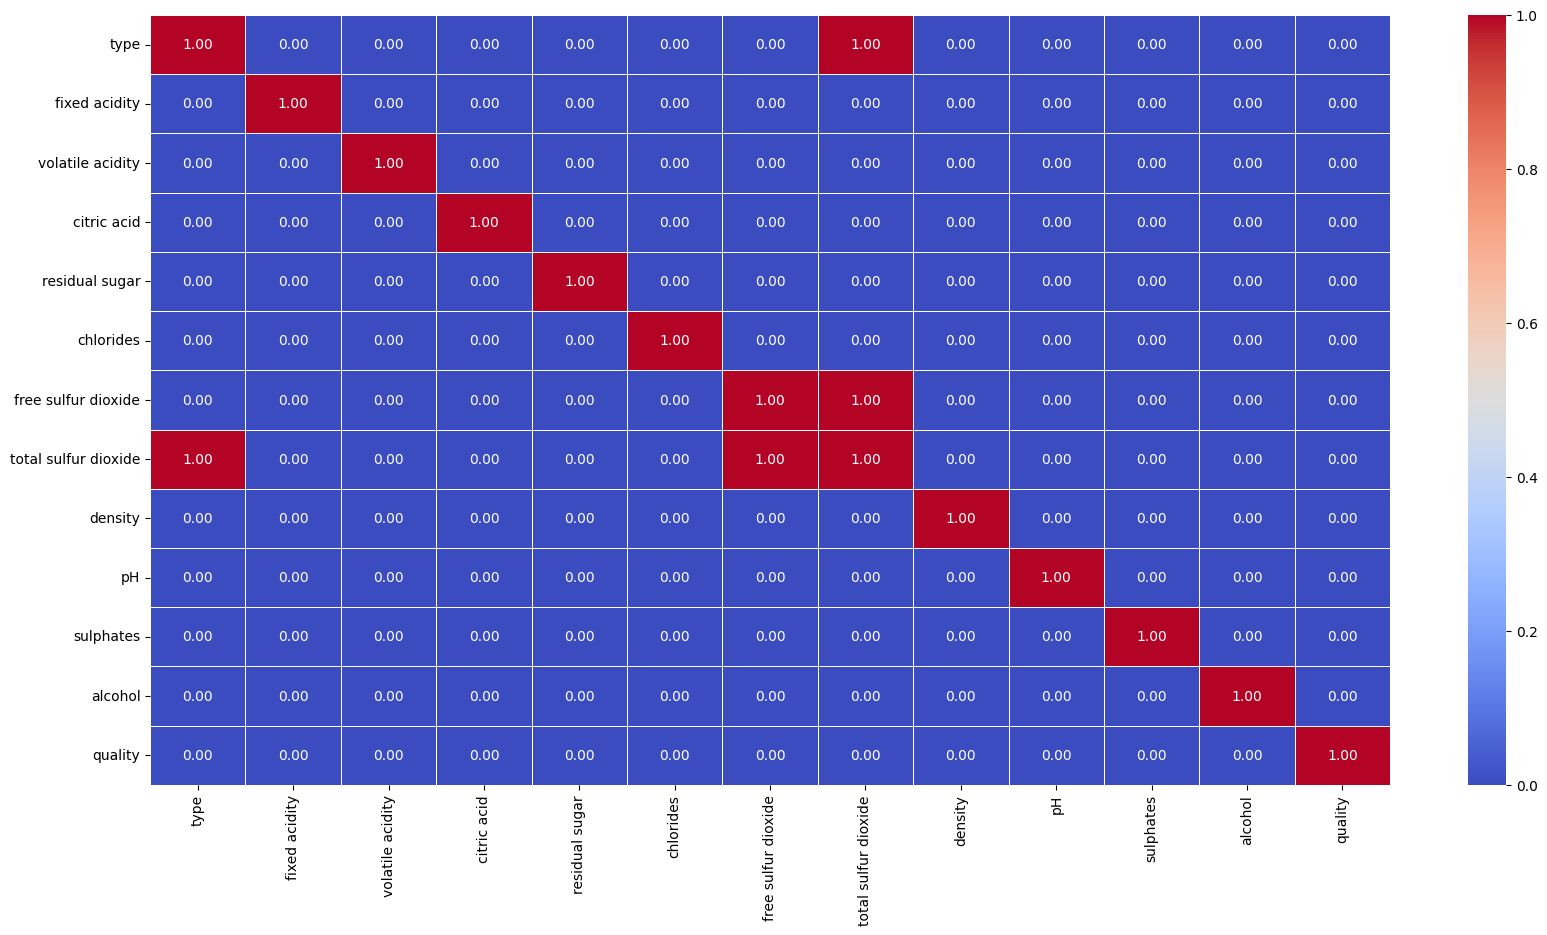

In [62]:
# sb.heatmap(df.corr()>0.7,annot=True,fmt='.2ft')
plt.figure(figsize=(20, 10)) 
sb.heatmap(df.corr()>0.7, annot=True,  cmap='coolwarm', fmt=".2f", linewidths=0.5) 

Quality column has 7 unique values which I am considering as 1 when greater than 5 and 0 if less thamn 5

In [63]:

df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [64]:
df['quality_cat'] = [1 if x > 5 else 0 for x in df['quality']]

Now drop df['quality]

In [65]:
df=df.drop(columns='quality')

In [66]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,1
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


# Model Training

Now let us assign features to x and target to y. Since we are predecting the quality it is ideal to remove quality and quality_cat while assigning the features to these columns. axis = 1 refer to specify that the column is removed, if axis = 0 rows are to be removed.

In [67]:
x = df.drop(['quality_cat'],axis=1)
y = df['quality_cat']

test_size=0.2: This means that 20% of the data will be used for testing, and the remaining 80% will be used for training.\
random_state=0.4: This is a seed value for random number generation. It ensures that the data is split in the same way every time you run the code, making the results reproducible.

In [68]:
xtrain, xtest,ytrain,ytest =  train_test_split(x,y,test_size=0.2,random_state=40)
xtrain.shape, ytrain.shape

((5197, 12), (5197,))

The features in dataset have very different ranges. For example:
* Fixed acidity ranges roughly between 6 and 8.
* Residual sugar can range from 1.6 to 20.7.
* Total sulfur dioxide ranges from 97 to 186.
* Density values are around 1.0.
* Alcohol levels might range from 8.8 to 10.1.

Features with larger ranges (like total sulfur dioxide) could dominate the model's training process, leading it to pay less attention to features with smaller ranges (like pH or chlorides).

Hence we are performing normalisation using minmaxscaler

fit_transform(xtrain): Fits the scaler to the training data and then transforms it.
transform(xtest): Transforms the test data using the already-fitted scaler from the training data.

In [69]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Since we are dealing with categorical data I will be using the folowing models
* Decision Trees
* Random Forest
* Gradient Boosting Machines (GBM)
* Naive Bayes
* k-Nearest Neighbors (k-NN)
* Logistic Regression
* XGBClassifier
* Support Vector Machines (SVM)


In [70]:
models = [tree.DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),HistGradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=3),LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(len(models)):
    models[i].fit(xtrain,ytrain)
    print(f'Model Name: {models[i]}')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))

Model Name: DecisionTreeClassifier()
Training Accuracy :  1.0
Validation Accuracy :  0.7604846701607054
Model Name: RandomForestClassifier()
Training Accuracy :  1.0
Validation Accuracy :  0.8085634597112821
Model Name: GaussianNB()
Training Accuracy :  0.6390024481656279
Validation Accuracy :  0.6347478060093379
Model Name: HistGradientBoostingClassifier()
Training Accuracy :  0.9111541261227397
Validation Accuracy :  0.7913384620099917
Model Name: KNeighborsClassifier(n_neighbors=3)
Training Accuracy :  0.8625339071735872
Validation Accuracy :  0.7448176867829303
Model Name: LogisticRegression()
Training Accuracy :  0.7025688218063545
Validation Accuracy :  0.7017781796262809
Model Name: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=Non

Best Model: RandomForestClassifier with a validation accuracy of 0.8113 and perfect training accuracy. This model provides the best generalization to new data without overfitting excessively.\
Runner-up: XGBClassifier also performs well with a validation accuracy of 0.8037, making it another strong option.\
If the focus is strictly on validation accuracy and generalization, RandomForestClassifier would be the best choice.